<a href="https://colab.research.google.com/github/sultanbst123/MachineHack-Costumer-Feedback-Analysis/blob/main/Costumer_Feedbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Sentiments

## Library & File

In [ ]:
pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 5.3 MB/s 


In [ ]:
pip install transformers

     |████████████████████████████████| 3.5 MB 5.2 MB/s 
     |████████████████████████████████| 596 kB 61.8 MB/s 
     |████████████████████████████████| 6.8 MB 39.7 MB/s 
     |████████████████████████████████| 67 kB 4.3 MB/s 
     |████████████████████████████████| 895 kB 36.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
pip install contractions

     |████████████████████████████████| 284 kB 5.3 MB/s 
     |████████████████████████████████| 321 kB 49.0 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85453 sha256=2be8fa021e6c91d286303211cf0b038f08ab92dd9167818c732081eb160dca8f
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
#basic library
import numpy as np
import pandas as pd
import random
import os 
import re
 
#deep learning library
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_addons as tfa 

#visualization library
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
 
#text preprocesing library
import nltk
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import contractions

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, f1_score, mean_squared_log_error, log_loss, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
# transformers library 

# distilbert
from transformers import DistilBertTokenizerFast, BertTokenizerFast#tokenizer mengunakan subword 
 
from transformers import TFDistilBertModel, DistilBertConfig #distilbert
from transformers import TFBertModel, BertConfig #bert

In [ ]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#setting seed 
def set_seed(seed=42):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)


set_seed()

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Customer Sentiment analysis /train.csv") 
test = pd.read_csv("/content/drive/MyDrive/Customer Sentiment analysis /test.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6136 entries, 0 to 6135
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Id                             6136 non-null   int64 
 1   Review                         6136 non-null   object
 2   Components                     6136 non-null   int64 
 3   Delivery and Customer Support  6136 non-null   int64 
 4   Design and Aesthetics          6136 non-null   int64 
 5   Dimensions                     6136 non-null   int64 
 6   Features                       6136 non-null   int64 
 7   Functionality                  6136 non-null   int64 
 8   Installation                   6136 non-null   int64 
 9   Material                       6136 non-null   int64 
 10  Price                          6136 non-null   int64 
 11  Quality                        6136 non-null   int64 
 12  Usability                      6136 non-null   int64 
 13  Pol

In [ ]:
train.head()

,Id,Review,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0,For some reason everybody complains and I'm co...,0,0,0,0,0,0,0,0,0,0,1,0
1,1,"I like everything about it, great choice of sp...",0,0,0,0,1,1,0,0,0,0,0,1
2,2,Excellent ceiling fan brace. Easy to install a...,0,0,0,0,0,0,1,0,0,1,0,1
3,3,Work great easy to use . No issues at all with...,0,0,0,0,0,1,0,0,0,0,1,1
4,4,I would recommend this product because it is p...,0,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
train.isnull().sum() #check nan values

Id                               0
Review                           0
Components                       0
Delivery and Customer Support    0
Design and Aesthetics            0
Dimensions                       0
Features                         0
Functionality                    0
Installation                     0
Material                         0
Price                            0
Quality                          0
Usability                        0
Polarity                         0
dtype: int64

In [ ]:
train.duplicated().sum() # check duplicated values

0

## EDA

In [ ]:
# check target

In [ ]:
target = train.iloc[:,2:]

In [ ]:
for i in target.columns: 
    print(i) 
    print(train[i].value_counts())
    print("")

Components
0    5862
1     274
Name: Components, dtype: int64

Delivery and Customer Support
0    5957
1     179
Name: Delivery and Customer Support, dtype: int64

Design and Aesthetics
0    5486
1     650
Name: Design and Aesthetics, dtype: int64

Dimensions
0    5441
1     695
Name: Dimensions, dtype: int64

Features
0    5823
1     313
Name: Features, dtype: int64

Functionality
0    3598
1    2538
Name: Functionality, dtype: int64

Installation
0    5374
1     762
Name: Installation, dtype: int64

Material
0    5981
1     155
Name: Material, dtype: int64

Price
0    5282
1     854
Name: Price, dtype: int64

Quality
0    3959
1    2177
Name: Quality, dtype: int64

Usability
0    4907
1    1229
Name: Usability, dtype: int64

Polarity
1    4770
0    1366
Name: Polarity, dtype: int64



In [ ]:
# check review

In [ ]:
train["Review"].sample(10)

4290    metal is best, plastic deteriorates. worth the...
3206    For the money, if you'd like to have a pair in...
5767                           Good product - very strong
5097                                     It looks amazing
2684    This camera did not work well and their is no ...
3256          Worked as intended, no issues with install.
4851    Poor quality and didn't fit my Hampton Bay fur...
1032    Picture and video quality are good. But facial...
3830    Ring wired indoor camera best camera on the ma...
4471    Such a cute toilet! Easy install & flushes lik...
Name: Review, dtype: object

In [ ]:

# berdasarkan kata
train_kata = train.Review.str.split().str.len()
test_kata = test.Review.str.split().str.len()

#berdasarkan huruf dan sejenisnya 
train_huruf = train.Review.str.len()
test_huruf = test.Review.str.len()

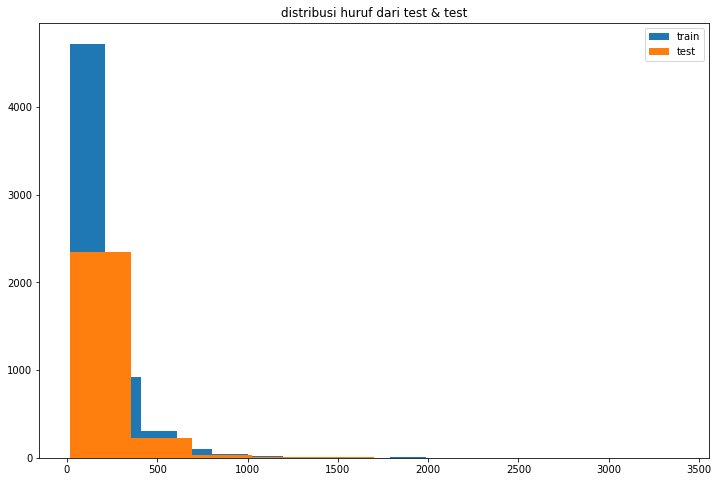

In [ ]:
plt.subplots(figsize=(12, 8))
plt.hist(train_huruf,label="train")
plt.hist(test_huruf,label="test")
plt.title("distribusi huruf dari test & test") 
plt.legend()

In [ ]:
print(f"total kata dari train: {train_kata.sum()} kata") 
print(f"total kata dari test: {test_kata.sum()} kata")

total kata dari train: 184132 kata
total kata dari test: 79941 kata


In [ ]:

# melihat statistics per kata 

print("descriptive analysis dari train")
print(train_kata.describe())
print(" ") 
print("descriptive analysis dari test")
print(test_kata.describe())

descriptive analysis dari train
count    6136.000000
mean       30.008475
std        32.793149
min         2.000000
25%        10.000000
50%        19.000000
75%        38.000000
max       374.000000
Name: Review, dtype: float64
 
descriptive analysis dari test
count    2631.000000
mean       30.384265
std        36.614156
min         2.000000
25%        10.000000
50%        19.000000
75%        38.000000
max       649.000000
Name: Review, dtype: float64


## Cleaning

In [ ]:
#mengubah kata-kata singkat / contractions type_1 
def cont_1(tweet): 
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "we are", tweet)
    tweet = re.sub(r"That's", "that is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "what is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "there is", tweet)
    tweet = re.sub(r"He's", "he is", tweet)
    tweet = re.sub(r"It's", "it is", tweet)
    tweet = re.sub(r"You're", "you are", tweet)
    tweet = re.sub(r"I'M", "i am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "i am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "i am", tweet)
    tweet = re.sub(r"I'm", "i am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "i have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "we have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "you all", tweet)
    tweet = re.sub(r"Weren't", "were not", tweet)
    tweet = re.sub(r"Didn't", "did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "that is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "i would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "you are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "i will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "they are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "i would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "i have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "i will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "i would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "i have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "i will", tweet)
    tweet = re.sub(r"I'd", "i would", tweet)
    tweet = re.sub(r"Let's", "let us", tweet)
    tweet = re.sub(r"you'd", "you would", tweet)
    tweet = re.sub(r"It's", "it is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "have not", tweet)
    tweet = re.sub(r"Could've", "could have", tweet)
    tweet = re.sub(r"amp", "&", tweet)
    tweet = re.sub(r"<br /><br />", " ", tweet)
    return tweet

In [ ]:
#contractions type_2
def cont_2(tweet):
    ts = tweet.split() # harus pakai split perkata 
    tweet = " ".join([contractions.fix(words) for words in ts])

    return tweet

In [ ]:

# hapus emoji 

def emoji(tweet): 
    emoji_pattern = re.compile("["        
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
    
    text =  emoji_pattern.sub(r"", tweet)
 
    return text

In [ ]:
#menghapus semua simbol, white space dan @user mention
def remove_punc(tweet): 
    #tweet = re.sub(r"@\S", "",tweet)
    #tweet = re.sub(r"#\S+", " ", tweet)    
    tweet = re.sub(r"[^a-zA-Z]"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    tweet = re.sub(r"https*\S+", " ", tweet) # remove links
    tweet = re.sub(r"http*\S+", " ", tweet)
    # cleaning up text
    tweet = re.sub(r"\"\w+", "", tweet) 
    tweet = re.sub(r"\w*\d+\w*", "", tweet)
    tweet = re.sub(r"\s{2,}", " ", tweet)
    tweet = re.sub(r"\s[^\w\s]\s", "", tweet)

    # remove single letters and numbers surrounded by space
    #tweet = re.sub(r"\s[a-z]\s|\s[0-9]\s", " ", tweet)
    return tweet

In [ ]:
#menghapus stopwords
def remove_stopwords(tweet):
    ts = word_tokenize(tweet) 
    ts_without_sw = [word for word in ts if not word in stopwords.words("english")]
    tweet = " ".join([str(elem) for elem in ts_without_sw])

    return tweet

In [ ]:
#lemmatizer
def lemma(tweet):
    ts = word_tokenize(tweet)
    wnl = WordNetLemmatizer()
    tweet = " ".join([wnl.lemmatize(words) for words in ts])

    return tweet

In [ ]:
#stemming mengunakan snowball
def stem(tweet):
    ts = word_tokenize(tweet)
    wnl = SnowballStemmer("english") 
    tweet = " ".join([wnl.stem(words) for words in ts])

    return tweet

In [ ]:
def clean(tweet):
    # // soft cleaning //
    #text
    tweet = tweet.lower()
    tweet = cont_1(tweet) # manual 
    tweet = cont_2(tweet) # auto
    tweet = emoji(tweet)

    # matikan jika mengunakan transformer
    # khusus yang di bawah 
    #symbol number special character
    #tweet = remove_punc(tweet)   
    
    # // hard cleaning //
    #stopword and lemmatizer
    #tweet = remove_stopwords(tweet)
    #tweet = lemma(tweet)
    #tweet = stem(tweet)
    return tweet

In [ ]:
train["clean_review"] = train["Review"].apply(clean)
test["clean_review"] = test["Review"].apply(clean)

In [ ]:
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 900, height = 700,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off")
    plt.title(title,fontsize=17)
    plt.show()

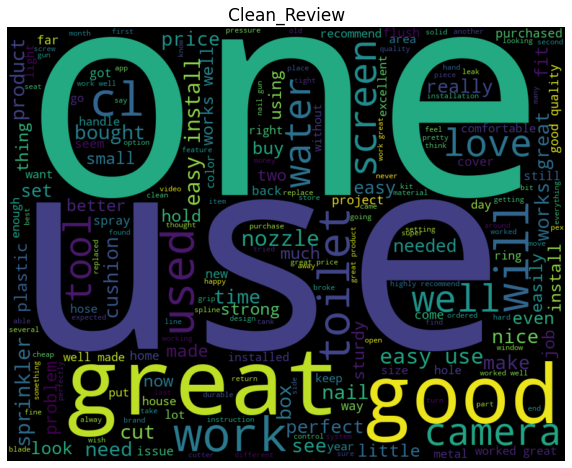

In [ ]:
wordCloud_generator(train["clean_review"], title="Clean_Review")

In [ ]:

# sebelum membersikan teks
print(f"Total kata dari train: {train.Review.apply(lambda x: len(x.split())).sum()}")
print(f"Total kata dari test: {test.Review.apply(lambda x: len(x.split())).sum()}")

Total kata dari train: 184132
Total kata dari test: 79941


In [ ]:

# setelah membersikan teks
print(f"Total kata dari train: {train.clean_review.apply(lambda x: len(x.split())).sum()}")
print(f"Total kata dari test: {test.clean_review.apply(lambda x: len(x.split())).sum()}")

Total kata dari train: 186438
Total kata dari test: 80944


## Split & Tokenize

In [ ]:
x = train.clean_review
y = train.iloc[:,2:-1]
test_cp = test.clean_review

In [ ]:

#split 90:10
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.1, random_state=42)

In [ ]:

# tokenize mengunakan bert fast, karena mempunyai kelebihan banyak 

tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
MAX_LENGTH = 256 # <=== default
# 64,128,256,512,1024 #pilih max length

# buat function tokenize 

def tokenize(sentences, tokenizer,max_length = MAX_LENGTH):
    input_ids, input_masks= [],[]
    for sentence in sentences:
        inputs = tokenizer.encode_plus(sentence,truncation=True, add_special_tokens=True, max_length=MAX_LENGTH, pad_to_max_length=True, 
                                             return_attention_mask=True, return_token_type_ids=False)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
       
    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks,dtype='int32')

In [ ]:
# Encode train
X_train_ids, X_train_attention = tokenize(x_train,tokenizer)

# Encode valid
X_valid_ids, X_valid_attention = tokenize(x_val,tokenizer) 

# Encode test
X_test_ids, X_test_attention = tokenize(test_cp,tokenizer)

## TPU

In [ ]:

try: # <= detect TPU 
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print("Running on TPU ", tpu.cluster_spec().as_dict()["worker"])
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError: # <= detect GPU/CPU
    print("Not connected to a TPU runtime. Using CPU/GPU strategy")
    strategy = tf.distribute.MirroredStrategy()

Running on TPU  ['10.32.182.250:8470']
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.32.182.250:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.32.182.250:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
print('Number of replicas:', strategy.num_replicas_in_sync)

Number of replicas: 8


## Make Dataset & Hyper params

In [ ]:
BATCH_SIZE = 32 # * strategy.num_replicas_in_sync
AUTO = tf.data.AUTOTUNE

# learning rates: 3e-4, 1e-4, 5e-5, 3e-5 for Bert 
EPOCHS = 15
INIT_LR = 5e-5 # learning rate
MAX_LR = 5e-3
Wd = 1e-4

steps_per_epoch = len(x_train) // BATCH_SIZE

# Learning rate scheduler
clr = tfa.optimizers.Triangular2CyclicalLearningRate(
    initial_learning_rate=INIT_LR,
    maximal_learning_rate=MAX_LR,
    step_size= 2 * steps_per_epoch
)

# optimizer
SGD = tf.keras.optimizers.SGD(learning_rate=clr, momentum=0.9)
SGDW = tfa.optimizers.SGDW(learning_rate=clr, weight_decay = Wd, momentum=0.9)

ADAM = tf.keras.optimizers.Adam(learning_rate=INIT_LR)
ADAMW = tfa.optimizers.AdamW(learning_rate = INIT_LR,weight_decay = Wd)
ADABELIEF = tfa.optimizers.AdaBelief(learning_rate = INIT_LR, weight_decay = Wd)

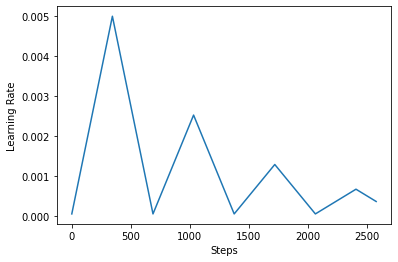

In [ ]:
step = np.arange(0, EPOCHS * steps_per_epoch)
lr = clr(step)
plt.plot(step, lr)
plt.xlabel("Steps")
plt.ylabel("Learning Rate")
plt.show()

In [ ]:
train_ds = (
    tf.data.Dataset.from_tensor_slices(((X_train_ids, X_train_attention), y_train))
    .shuffle(1000)
    .batch(BATCH_SIZE)
    .prefetch(AUTO) 
)

val_ds = (
    tf.data.Dataset.from_tensor_slices(((X_valid_ids, X_valid_attention), y_val)) 
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

test_ds = (
    tf.data.Dataset.from_tensor_slices((X_test_ids, X_test_attention))
    .batch(BATCH_SIZE)
)

In [ ]:
train_ds, val_ds, test_ds

(<PrefetchDataset shapes: (((None, 256), (None, 256)), (None, 12)), types: ((tf.int32, tf.int32), tf.int64)>,
 <PrefetchDataset shapes: (((None, 256), (None, 256)), (None, 12)), types: ((tf.int32, tf.int32), tf.int64)>,
 <BatchDataset shapes: ((None, 256), (None, 256)), types: (tf.int32, tf.int32)>)

## DistilBert

In [ ]:

#fine tuning bert (jika belum puas dengan hasil) 

config = DistilBertConfig(dropout=0.2, attention_dropout=0.2)
config.output_hidden_states = False

distilbert = TFDistilBertModel.from_pretrained('distilbert-base-uncased', config = config)

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_layer_norm', 'vocab_projector', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
distilbert.config

DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "attention_dropout": 0.2,
  "dim": 768,
  "dropout": 0.2,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "transformers_version": "4.16.0",
  "vocab_size": 30522
}

In [ ]:

#tambahkan bi-lstm(lstm dua arah)  lalu ratakan jadi 1D mengunakan globalmaxpooling

def build_model(transformer, max_length=MAX_LENGTH):
  
    # input layers
    input_ids_in = layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
    input_masks_in = layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32')

    embedding_layer = transformer(input_ids_in, attention_mask=input_masks_in)[0]
    #cls_token = embedding_layer[:,0,:]

    X = layers.Bidirectional(layers.LSTM(256, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(embedding_layer)
    X = layers.GlobalMaxPool1D()(X) 
    X = layers.Dropout(0.2)(X)                   
    X = layers.Dense(256, activation="relu", kernel_initializer = "he_normal")(X)
    X = layers.Dropout(0.2)(X)
    X = layers.Dense(32, activation="relu", kernel_initializer = "he_normal")(X)
    X = layers.Dropout(0.2)(X)
    X = layers.Dense(12, activation='sigmoid')(X)
    model = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs = X)    
    
    #freeze distilbert layers 
    #for layer in model.layers[:3]:
        #layer.trainable = False

    return model

In [ ]:
# buat ulang model di TPU
 
with strategy.scope(): # <=== with TPU
     transformer_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased',config = config) 

     distilbert_model = build_model(transformer_model)
     
     distilbert_model.compile(optimizer = ADABELIEF, 
                              loss=tf.keras.losses.BinaryCrossentropy(),#label_smoothing = 0.1), 
                              metrics =["accuracy"])

distilbert_model.summary()

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_layer_norm', 'vocab_projector', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_token (InputLayer)       [(None, 256)]        0           []                               
                                                                                                  
 masked_token (InputLayer)      [(None, 256)]        0           []                               
                                                                                                  
 tf_distil_bert_model_1 (TFDist  TFBaseModelOutput(l  66362880   ['input_token[0][0]',            
 ilBertModel)                   ast_hidden_state=(N               'masked_token[0][0]']           
                                one, 256, 768),                                                   
                                 hidden_states=None                                         

In [ ]:
# define cb

cp_best = f"best.h5"
cb_checkpt = tf.keras.callbacks.ModelCheckpoint(cp_best, monitor = 'val_loss', verbose = 0,
                                 save_best_only = True,
                                 save_weights_only = True,
                                 mode = 'min')

es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, verbose=1, mode="min", restore_best_weights=True)


# fit
history = distilbert_model.fit(train_ds, validation_data = val_ds, 
                               epochs = EPOCHS, verbose = 1, callbacks = [cb_checkpt])

distilbert_model.load_weights(cp_best)

Epoch 1/15
173/173 [==============================] - 171s 537ms/step - loss: 0.5436 - accuracy: 0.0330 - val_loss: 0.4220 - val_accuracy: 0.0000e+00
Epoch 2/15
173/173 [==============================] - 39s 224ms/step - loss: 0.4136 - accuracy: 0.1155 - val_loss: 0.3188 - val_accuracy: 0.2378
Epoch 3/15
173/173 [==============================] - 39s 224ms/step - loss: 0.3400 - accuracy: 0.2287 - val_loss: 0.2590 - val_accuracy: 0.2655
Epoch 4/15
173/173 [==============================] - 39s 225ms/step - loss: 0.2897 - accuracy: 0.2677 - val_loss: 0.2279 - val_accuracy: 0.3990
Epoch 5/15
173/173 [==============================] - 39s 224ms/step - loss: 0.2486 - accuracy: 0.3173 - val_loss: 0.2005 - val_accuracy: 0.4186
Epoch 6/15
173/173 [==============================] - 39s 224ms/step - loss: 0.2216 - accuracy: 0.3587 - val_loss: 0.1865 - val_accuracy: 0.4169
Epoch 7/15
173/173 [==============================] - 39s 228ms/step - loss: 0.1961 - accuracy: 0.3564 - val_loss: 0.1750 - v

In [ ]:
loss, accuracy, = distilbert_model.evaluate(val_ds)

print(f"Loss accuracy: {round(loss * 100, 2)}%")
print(f"Val accuracy: {round(accuracy * 100, 2)}%")

20/20 [==============================] - 2s 45ms/step - loss: 0.1574 - accuracy: 0.4055
Loss accuracy: 15.74%
Val accuracy: 40.55%


In [ ]:

# predict Test dataset

y_true_distilbert = distilbert_model.predict((X_test_ids, X_test_attention))

In [ ]:
# check probability 

y_true_distilbert

array([[1.65052354e-01, 2.66008377e-02, 2.67850757e-02, ...,
        8.29942107e-01, 4.70571816e-02, 1.52891070e-01],
       [5.92172146e-05, 1.83990598e-03, 5.24511933e-03, ...,
        1.10703230e-01, 1.48591399e-03, 9.98713732e-01],
       [1.73354149e-03, 3.09422612e-03, 5.95864654e-03, ...,
        1.44506395e-02, 9.95209157e-01, 9.94892240e-01],
       ...,
       [5.11610508e-03, 2.06395984e-02, 1.08821690e-02, ...,
        9.46673751e-01, 1.14430487e-02, 9.90527391e-01],
       [2.75153220e-02, 8.32327008e-02, 7.08373487e-01, ...,
        8.90168786e-01, 2.07530379e-01, 4.82412755e-01],
       [7.09787011e-03, 2.36228108e-03, 3.81568074e-03, ...,
        7.25248158e-02, 7.71744967e-01, 9.92629170e-01]], dtype=float32)

In [ ]:
# ini error 
#y_true = distilbert_model.predict(test_ds)

## Bert Base

In [ ]:

#fine tuning bert (jika belum puas dengan hasil) 

config = BertConfig() 
config.output_hidden_states = False

bert_base = TFBertModel.from_pretrained('bert-base-uncased', config = config)

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# cek bert apakah berubah setelah di tuning 

bert_base.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.16.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [ ]:

#tambahkan bi-lstm(lstm dua arah)  lalu ratakan jadi 1D mengunakan globalmaxpooling

def build_model(transformer, max_length=MAX_LENGTH):
  
    # input layers
    input_ids_in = layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
    input_masks_in = layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32')

    embedding_layer = transformer(input_ids_in, attention_mask=input_masks_in)[0]
    #cls_token = embedding_layer[:,0,:]

    X = layers.Bidirectional(layers.LSTM(256, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(embedding_layer)
    X = layers.GlobalMaxPool1D()(X) 
    X = layers.Dropout(0.2)(X)                   
    X = layers.Dense(256, activation="relu", kernel_initializer = "he_normal")(X)
    X = layers.Dropout(0.2)(X)
    X = layers.Dense(32, activation="relu", kernel_initializer = "he_normal")(X)
    X = layers.Dropout(0.2)(X)
    X = layers.Dense(12, activation='sigmoid')(X)
    model = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs = X)    
    
    #freeze distilbert layers 
    #for layer in model.layers[:3]:
        #layer.trainable = False

    return model

In [ ]:
# buat ulang model di TPU

with strategy.scope(): # <=== with TPU
     transformer_model = TFBertModel.from_pretrained('bert-base-uncased') 

     bert_base_model = build_model(transformer_model)
     
     bert_base_model.compile(optimizer = ADAMW,
                        loss=tf.keras.losses.BinaryCrossentropy(),#(label_smoothing = 0.1),
                        metrics =["accuracy"])

bert_base_model.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_token (InputLayer)       [(None, 256)]        0           []                               
                                                                                                  
 masked_token (InputLayer)      [(None, 256)]        0           []                               
                                                                                                  
 tf_bert_model_1 (TFBertModel)  TFBaseModelOutputWi  109482240   ['input_token[0][0]',            
                                thPoolingAndCrossAt               'masked_token[0][0]']           
                                tentions(last_hidde                                               
                                n_state=(None, 256,                                           

In [ ]:
# define cb

cp_best_1 = f"best_1.h5"
cb_checkpt = tf.keras.callbacks.ModelCheckpoint(cp_best_1, monitor = 'val_loss', verbose = 0,
                                 save_best_only = True,
                                 save_weights_only = True,
                                 mode = 'min')


# fit
history = bert_base_model.fit(train_ds, validation_data = val_ds, 
                               epochs = EPOCHS, verbose = 1, callbacks = [cb_checkpt])

bert_base_model.load_weights(cp_best_1)

Epoch 1/15


Instructions for updating:
use `experimental_local_results` instead.


Instructions for updating:
use `experimental_local_results` instead.


173/173 [==============================] - 230s 718ms/step - loss: 0.4498 - accuracy: 0.1081 - val_loss: 0.3500 - val_accuracy: 0.2215
Epoch 2/15
173/173 [==============================] - 47s 272ms/step - loss: 0.3403 - accuracy: 0.2427 - val_loss: 0.2613 - val_accuracy: 0.3388
Epoch 3/15
173/173 [==============================] - 47s 274ms/step - loss: 0.2789 - accuracy: 0.2923 - val_loss: 0.2174 - val_accuracy: 0.3241
Epoch 4/15
173/173 [==============================] - 47s 274ms/step - loss: 0.2322 - accuracy: 0.2975 - val_loss: 0.1890 - val_accuracy: 0.2248
Epoch 5/15
173/173 [==============================] - 49s 286ms/step - loss: 0.1966 - accuracy: 0.3012 - val_loss: 0.1826 - val_accuracy: 0.3192
Epoch 6/15
173/173 [==============================] - 48s 277ms/step - loss: 0.1687 - accuracy: 0.3017 - val_loss: 0.1617 - val_accuracy: 0.2590
Epoch 7/15
173/173 [==============================] - 48s 277ms/step - loss: 0.1464 - accuracy: 0.3004 - val_loss: 0.1572 - val_accuracy: 0.

In [ ]:
loss, accuracy = bert_base_model.evaluate(val_ds)

print(f"Loss accuracy: {round(loss * 100, 2)}%")
print(f"Val accuracy: {round(accuracy * 100, 2)}%")

20/20 [==============================] - 2s 57ms/step - loss: 0.1569 - accuracy: 0.1808
Loss accuracy: 15.69%
Val accuracy: 18.08%


In [ ]:

# predict Test dataset

y_true_bert_base = bert_base_model.predict((X_test_ids, X_test_attention))

In [ ]:
y_true_bert_base

array([[6.6992104e-02, 4.7915906e-02, 5.6103796e-02, ..., 8.1198823e-01,
        1.7918229e-02, 5.2443087e-02],
       [4.0563941e-04, 6.9522858e-04, 1.8080175e-03, ..., 1.1340290e-02,
        6.7429245e-03, 9.9914646e-01],
       [5.6850910e-04, 1.3738871e-03, 1.9834936e-03, ..., 9.9409223e-03,
        9.7916269e-01, 9.8361665e-01],
       ...,
       [1.3792515e-03, 7.3389113e-03, 7.0747733e-04, ..., 9.5245785e-01,
        5.3013861e-03, 9.9725163e-01],
       [7.3787570e-04, 1.5721321e-03, 6.4536566e-01, ..., 9.1139114e-01,
        4.3201149e-03, 9.1261721e-01],
       [4.2396486e-03, 1.5152991e-03, 2.9927790e-03, ..., 1.7726719e-02,
        9.4489443e-01, 9.8855042e-01]], dtype=float32)

## Bert Large

In [ ]:


bert_large = TFBertModel.from_pretrained('bert-large-uncased')

Some layers from the model checkpoint at bert-large-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-large-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# cek bert apakah berubah setelah di tuning 

bert_large.config

BertConfig {
  "_name_or_path": "bert-large-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.16.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [ ]:

#tambahkan bi-lstm(lstm dua arah)  lalu ratakan jadi 1D mengunakan globalmaxpooling

def build_model(transformer, max_length=MAX_LENGTH):
  
    # input layers
    input_ids_in = layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
    input_masks_in = layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32')

    embedding_layer = transformer(input_ids_in, attention_mask=input_masks_in)[0]
    #cls_token = embedding_layer[:,0,:]

    X = layers.Bidirectional(layers.LSTM(256, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(embedding_layer)
    X = layers.GlobalMaxPool1D()(X) 
    X = layers.Dropout(0.2)(X)                   
    X = layers.Dense(256, activation="relu", kernel_initializer = "he_normal")(X)
    X = layers.Dropout(0.2)(X)
    X = layers.Dense(32, activation="relu", kernel_initializer = "he_normal")(X)
    X = layers.Dropout(0.2)(X)
    X = layers.Dense(12, activation='sigmoid')(X)
    model = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs = X)    
    
    #freeze distilbert layers 
    for layer in model.layers[:3]:
        layer.trainable = False

    return model

In [ ]:
# buat ulang model di TPU

with strategy.scope(): # <=== with TPU
     transformer_model = TFBertModel.from_pretrained('bert-large-uncased') 

     bert_large_model = build_model(transformer_model)
     
     bert_large_model.compile(optimizer = ADAMW,
                        loss=tf.keras.losses.BinaryCrossentropy(),#(label_smoothing = 0.1),
                        metrics =["accuracy"])

bert_large_model.summary()

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.37G [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-large-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-large-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_token (InputLayer)       [(None, 256)]        0           []                               
                                                                                                  
 masked_token (InputLayer)      [(None, 256)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  335141888   ['input_token[0][0]',            
                                thPoolingAndCrossAt               'masked_token[0][0]']           
                                tentions(last_hidde                                               
                                n_state=(None, 256,                                           

In [ ]:
# define cb

cp_best_2 = f"best_2.h5"
cb_checkpt = tf.keras.callbacks.ModelCheckpoint(cp_best_2, monitor = 'val_loss', verbose = 0,
                                 save_best_only = True,
                                 save_weights_only = True,
                                 mode = 'min')


# fit
history = bert_large_model.fit(train_ds, validation_data = val_ds, 
                               epochs = EPOCHS, verbose = 1, callbacks = [cb_checkpt])

bert_large_model.load_weights(cp_best_2)

Epoch 1/15


Instructions for updating:
use `experimental_local_results` instead.


Instructions for updating:
use `experimental_local_results` instead.


173/173 [==============================] - 413s 1s/step - loss: 0.5084 - accuracy: 0.1141 - val_loss: 0.3609 - val_accuracy: 0.1075
Epoch 2/15
173/173 [==============================] - 87s 501ms/step - loss: 0.3759 - accuracy: 0.2258 - val_loss: 0.2707 - val_accuracy: 0.1954
Epoch 3/15
173/173 [==============================] - 86s 498ms/step - loss: 0.3083 - accuracy: 0.2407 - val_loss: 0.2261 - val_accuracy: 0.1857
Epoch 4/15
173/173 [==============================] - 86s 496ms/step - loss: 0.2612 - accuracy: 0.2351 - val_loss: 0.1998 - val_accuracy: 0.1694
Epoch 5/15
173/173 [==============================] - 86s 499ms/step - loss: 0.2221 - accuracy: 0.2407 - val_loss: 0.1819 - val_accuracy: 0.1645
Epoch 6/15
173/173 [==============================] - 86s 496ms/step - loss: 0.1908 - accuracy: 0.2512 - val_loss: 0.1754 - val_accuracy: 0.2036
Epoch 7/15
173/173 [==============================] - 86s 497ms/step - loss: 0.1727 - accuracy: 0.2561 - val_loss: 0.1649 - val_accuracy: 0.198

In [ ]:
loss, accuracy = bert_large_model.evaluate(val_ds)

print(f"Loss accuracy: {round(loss * 100, 2)}%")
print(f"Val accuracy: {round(accuracy * 100, 2)}%")

20/20 [==============================] - 3s 95ms/step - loss: 0.1613 - accuracy: 0.2508
Loss accuracy: 16.13%
Val accuracy: 25.08%


In [ ]:

# predict Test dataset

y_true_bert_large = bert_large_model.predict((X_test_ids, X_test_attention))

In [ ]:
y_true_bert_large

array([[0.03833476, 0.03667158, 0.14207089, ..., 0.8763881 , 0.01690194,
        0.02553013],
       [0.01159328, 0.00427672, 0.01031661, ..., 0.03443623, 0.00175366,
        0.9970122 ],
       [0.00666118, 0.00898817, 0.00385651, ..., 0.03637302, 0.9972949 ,
        0.99686503],
       ...,
       [0.01652718, 0.01038715, 0.01033059, ..., 0.9698838 , 0.00458601,
        0.99423397],
       [0.00864148, 0.01351452, 0.8544103 , ..., 0.95111465, 0.00494114,
        0.97752416],
       [0.08765084, 0.01412845, 0.00637919, ..., 0.12744948, 0.6928713 ,
        0.9742683 ]], dtype=float32)

## Buat file baru

In [ ]:
# masukan hasil prediksi ke dataframe

In [ ]:
model_1 = pd.DataFrame(y_true_distilbert)
model_2 = pd.DataFrame(y_true_bert_base)
model_3 = pd.DataFrame(y_true_bert_large)

In [ ]:

# submission file 

sub = pd.read_csv("/content/drive/MyDrive/Customer Sentiment analysis /submission.csv")

In [ ]:
sub

In [ ]:
name = dict(zip([x for x in range(12)], sub.columns.to_list()))
# ubah nama column ke yang benar

In [ ]:
name

{0: 'Components',
 1: 'Delivery and Customer Support',
 2: 'Design and Aesthetics',
 3: 'Dimensions',
 4: 'Features',
 5: 'Functionality',
 6: 'Installation',
 7: 'Material',
 8: 'Price',
 9: 'Quality',
 10: 'Usability',
 11: 'Polarity'}

In [ ]:

# rename column

model_1.rename(name, axis=1, inplace = True) 
model_2.rename(name, axis=1, inplace = True) 
model_3.rename(name, axis=1, inplace = True)

In [ ]:
model_1.to_csv("distilbert_model.csv", index=False)

In [ ]:
model_2.to_csv("bert_base_model.csv", index=False)

In [ ]:
model_3.to_csv("bert_large_model.csv", index=False)

In [ ]:
# simpan ke file drive

In [ ]:
!cp "/content/bert_base_model.csv" "/content/drive/MyDrive/swintransformertf"

## submission

In [ ]:
# blending ensemble untuk mencegah varianc

In [ ]:
model_pred_1 = pd.read_csv("/content/drive/MyDrive/swintransformertf/bert_base_model.csv")
model_pred_2 = pd.read_csv("/content/drive/MyDrive/swintransformertf/bert_large_model.csv")
model_pred_3 = pd.read_csv("/content/drive/MyDrive/swintransformertf/distilbert_model.csv")

In [ ]:
# blending predict

In [ ]:

# ambil rata rata nya 

blend = (model_pred_1.values + model_pred_2.values + model_pred_3.values)/3

In [ ]:
blend

array([[0.0901264 , 0.03706277, 0.07498659, ..., 0.83943948, 0.02729245,
        0.07695476],
       [0.00401938, 0.00227062, 0.00578992, ..., 0.05215992, 0.0033275 ,
        0.9982908 ],
       [0.00298774, 0.00448543, 0.00393288, ..., 0.02025486, 0.99055559,
        0.99179131],
       ...,
       [0.00767418, 0.01278855, 0.00730674, ..., 0.95633847, 0.00711015,
        0.99400433],
       [0.01229823, 0.03277312, 0.73604982, ..., 0.9175582 , 0.07226388,
        0.79085137],
       [0.03299612, 0.00600201, 0.00439588, ..., 0.07256701, 0.80317023,
        0.9851493 ]])

In [ ]:
#buat submission akhir

In [ ]:
subs = pd.DataFrame(np.round(blend).astype("int"))
subs.rename(name, axis=1, inplace=True)

In [ ]:
subs

,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2626,0,0,0,0,0,0,1,0,0,1,1,1
2627,0,0,0,0,0,0,0,0,0,0,0,1
2628,0,0,0,0,0,1,0,0,0,1,0,1
2629,0,0,1,0,0,0,0,0,0,1,0,1


In [ ]:
subs.to_csv("my_submission.csv", index=False)